In [1]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [114]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [49]:
df=pd.read_csv('AAPL.csv')

In [55]:
df1=df.reset_index()

In [56]:
df1.sort_values('index',inplace=True,ascending=False)

In [94]:
df1

,index,Date,Close/Last,Volume,Open,High,Low
1258,1258,5/31/16,$24.97,169072160,$24.90,$25.10,$24.71
1257,1257,6/1/16,$24.62,116556400,$24.76,$24.89,$24.58
1256,1256,6/2/16,$24.43,160680800,$24.40,$24.46,$24.16
1255,1255,6/3/16,$24.48,113950280,$24.45,$24.57,$24.36
1254,1254,6/6/16,$24.66,93060800,$24.50,$25.47,$24.39
...,...,...,...,...,...,...,...
4,4,5/24/21,$127.10,63092950,$126.01,$127.94,$125.94
3,3,5/25/21,$126.90,72009480,$127.82,$128.32,$126.32
2,2,5/26/21,$126.85,56575920,$126.96,$127.39,$126.42
1,1,5/27/21,$125.28,94625600,$126.44,$127.64,$125.08


In [97]:
df1['Close/Last']=df1['Close/Last'].apply(lambda x:x.split('$')[1])

In [101]:
df1['Close/Last']=df1['Close/Last'].astype(float)

In [102]:
df2 = df1.reset_index()['Close/Last']

In [103]:
df2

0        24.97
1        24.62
2        24.43
3        24.48
4        24.66
         ...  
1254    127.10
1255    126.90
1256    126.85
1257    125.28
1258    124.61
Name: Close/Last, Length: 1259, dtype: float64

In [112]:
df2.shape

(1259,)

Text(0.5, 1.0, 'AAPL Price 5 year data')

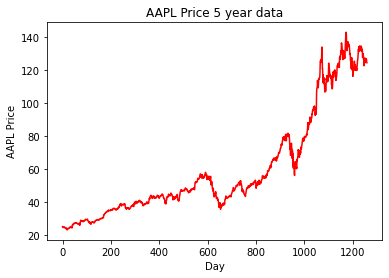

In [115]:
plt.plot(df2,color = 'red')
plt.xlabel('Day')
plt.ylabel('AAPL Price')
plt.title('AAPL Price 5 year data')

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
scaler = MinMaxScaler(feature_range=(0,1))

In [119]:
df2 = scaler.fit_transform(array(df2).reshape(-1,1))

In [122]:
df2

array([[0.01631294],
       [0.01339992],
       [0.01181856],
       ...,
       [0.86425302],
       [0.85118602],
       [0.84560965]])

In [108]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

In [123]:
X,y=split_sequence(df2,3)

In [127]:
X

array([[[0.01631294],
        [0.01339992],
        [0.01181856]],

       [[0.01339992],
        [0.01181856],
        [0.01223471]],

       [[0.01181856],
        [0.01223471],
        [0.01373283]],

       ...,

       [[0.85243446],
        [0.86633375],
        [0.86466916]],

       [[0.86633375],
        [0.86466916],
        [0.86425302]],

       [[0.86466916],
        [0.86425302],
        [0.85118602]]])

In [128]:
y

array([[0.01223471],
       [0.01373283],
       [0.01456513],
       ...,
       [0.86425302],
       [0.85118602],
       [0.84560965]])

In [130]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [131]:
model.fit(X, y, epochs=200, verbose=0)

In [135]:
x_test=array([126.85,125.28,124.61])

In [136]:
x_test = scaler.fit_transform(x_test.reshape(-1,1))

In [138]:
x_test.shape

(3, 1)

In [142]:
x_test = x_test.reshape((1, 3, 1))

In [143]:
x_test.shape

(1, 3, 1)

In [145]:
y_hat=model.predict(x_test,verbose=0)

In [146]:
y_hat

array([[0.06766772]], dtype=float32)

In [147]:
scaler.inverse_transform(y_hat)

array([[124.76157]], dtype=float32)